LIBRARIES

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

DATASET

In [2]:
diamonds = pd.read_csv('../data/processed/diamonds_prepared.csv')
diamonds.head()

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
2,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
3,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
4,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982


TRAIN TEST SPLIT

In [3]:
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [4]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


In [6]:
numerical_features = ['carat', 'table', 'dimension']

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
486,-0.026226,0.864091,0.143464
19811,1.348407,1.359644,1.353588
39742,-0.511390,-0.622566,-0.372761
31927,-0.834833,-0.622566,-0.905790
32753,-0.861787,-0.622566,-0.813165


In [7]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


MODEL DEVELOPMENT

In [8]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [10]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

In [12]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [14]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

MODEL EVALUATION

In [15]:
# Scaling X_train
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [16]:
mse = pd.DataFrame(columns=['train', 'test'],
                   index=['KNN', 'RF', 'Boosting'])
models_dict = {
   'KNN': knn,
   'RF': RF,
   'Boosting': boosting
}

for name, model in models_dict.items():
   mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
   mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,203.764221,239.529923
RF,52.287366,130.788418
Boosting,904.838013,846.212966


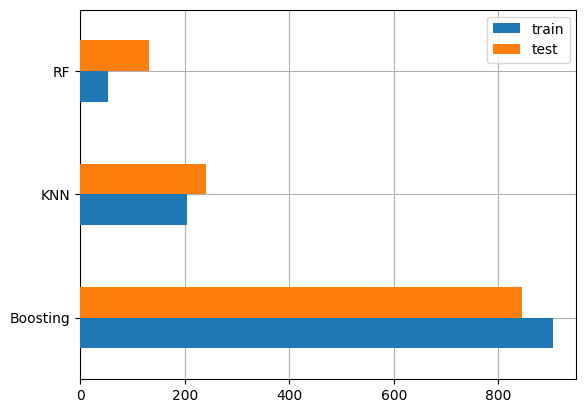

In [18]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [20]:
prediction = X_test.iloc[:1].copy()
pred_dict = {
   'y_true': y_test[:1]
}

for name, model in models_dict.items():
   pred_dict['prediction_'+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

,y_true,prediction_KNN,prediction_RF,prediction_Boosting
29703,886,923.2,884.2,788.1
